<a href="https://colab.research.google.com/github/dennisovich29/Time-series-prediction-LSTM/blob/main/Time_Series_ML_Project_Predicting_Closing_stock_price_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf

In [ ]:
df=yf.download('AAPL',start='2010-12-03',end='2025-06-10')
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-12-03,9.540400,9.576765,9.507340,9.527476,342092800
2010-12-06,9.621848,9.687366,9.569854,9.576466,448481600
2010-12-07,9.563542,9.737255,9.560838,9.731545,391454000
2010-12-08,9.647696,9.647996,9.530485,9.606221,321935600
2010-12-09,9.610127,9.692475,9.587887,9.681356,294151200


In [ ]:
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 2010-12-03 to 2025-06-09
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3650 non-null   float64
 1   High    3650 non-null   float64
 2   Low     3650 non-null   float64
 3   Close   3650 non-null   float64
 4   Volume  3650 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 171.1 KB


In [ ]:
import numpy as np
import pandas as pd
df['Return']=np.log(df['Close'] / df['Close'].shift(1))
df['Ma_5'] = df['Close'].rolling(window=5).mean()
df['Ma_20'] = df['Close'].rolling(window=20).mean()
df['Volatility_5']=df['Return'].rolling(window=5).std()
df['Target'] = df['Close'].shift(-1)

In [ ]:
features = ['Open', 'High', 'Low','Volume','Return','Ma_5','Ma_20','Volatility_5']

In [ ]:
df.dropna(inplace=True)


In [ ]:
df.head(10)

,Open,High,Low,Close,Volume,Return,Ma_5,Ma_20,Volatility_5,Target
Date,,,,,,,,,,
2010-12-31,9.694279,9.721928,9.656711,9.706000,193508000,-0.007804,9.758054,9.688042,0.006928,9.786846
2011-01-03,9.904959,9.925696,9.762803,9.786846,445138400,0.008295,9.774824,9.701011,0.007245,9.991213
2011-01-04,9.956651,9.993016,9.862280,9.991213,309080800,0.020667,9.814075,9.721748,0.011002,9.904359
2011-01-05,10.038099,10.048318,9.902856,9.904359,255519600,-0.008731,9.834091,9.730389,0.012426,10.059736
2011-01-06,10.029983,10.075664,10.005037,10.059736,300428800,0.015566,9.889631,9.753064,0.013404,10.037798
2011-01-07,10.101813,10.108726,9.974984,10.037798,311931200,-0.002183,9.955990,9.770887,0.012178,10.183263
2011-01-10,10.292059,10.315501,10.133373,10.183263,448560000,0.014388,10.035273,9.799709,0.012670,10.365085
2011-01-11,10.267710,10.367489,10.202492,10.365085,444108000,0.017697,10.110048,9.830529,0.011975,10.316102
2011-01-12,10.351264,10.351565,10.278534,10.316102,302590400,-0.004737,10.192397,9.862867,0.010699,10.373504


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume','Return','Ma_5','Ma_20','Volatility_5']])

scaled_df = pd.DataFrame(scaled_data, columns=['Open', 'High', 'Low', 'Close', 'Volume','Return','Ma_5','Ma_20','Volatility_5'], index=df.index)

In [ ]:
target_original = df['Target'].values.reshape(-1,1)

close_scaler = MinMaxScaler()
close_scaler.fit(target_original)  # fit on original data once

df['Target_scaled'] = close_scaler.transform(target_original)



In [ ]:
# X is the input features
X = scaled_df[['Open', 'High', 'Low', 'Volume', 'Return', 'Ma_5', 'Ma_20', 'Volatility_5']].values

# y is the scaled target
y = df['Target_scaled'].values.reshape(-1,1)

# Train-test split (80%-20%)
split_index = int(len(df) * 0.8)

x_train = X[:split_index]
x_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))  # (no_of_values, timestamps , features)
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))     # (n_test, 1, 8)

In [ ]:
x_train.shape

(2904, 1, 8)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1,8)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0200
Epoch 2/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.1898e-04
Epoch 3/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.7587e-04
Epoch 4/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.9654e-04
Epoch 5/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.8990e-04
Epoch 6/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.3999e-04
Epoch 7/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.9616e-04
Epoch 8/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.7277e-04
Epoch 9/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.9910e-04
Epoch 10/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.5679e-04
Epoch 11/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.3330e-04
Epoch 12/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.1145e-04
Epoch 13/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.8309e-04
Epoch 14/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.

In [ ]:
# from keras import backend as K
# K.clear_session()

In [ ]:
pred = model.predict(x_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [ ]:
print(pred.shape)
print(y_test.shape)

(726, 1)
(726, 1)


In [ ]:
pred_inverse = close_scaler.inverse_transform(pred)
y_test_true = close_scaler.inverse_transform(y_test)

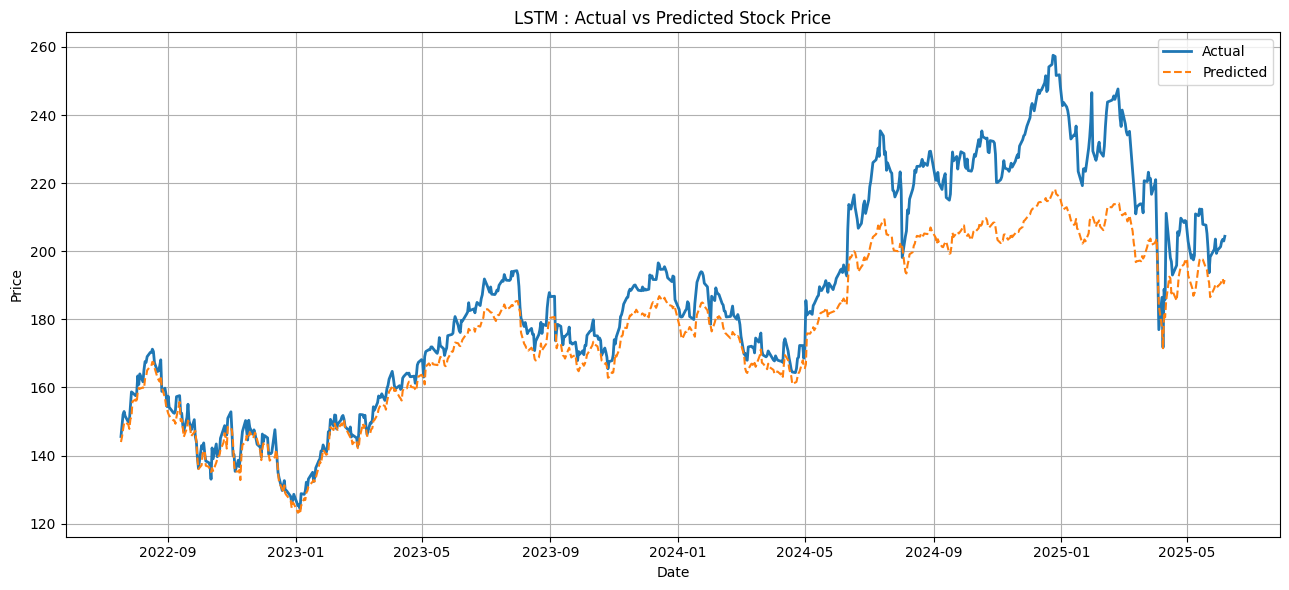

In [ ]:
import matplotlib.pyplot as plt

test_dates = df.index[-len(y_test):]
plt.figure(figsize=(13,6))
plt.plot(test_dates, y_test_true.flatten(), label='Actual', linewidth=2)
plt.plot(test_dates, pred_inverse.flatten(), label='Predicted', linestyle='--')
plt.title('LSTM : Actual vs Predicted Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
x_test.shape
# y_test.shape
pred.shape

(151, 1)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test_true, pred_inverse)
mae = mean_absolute_error(y_test_true, pred_inverse)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


NameError: name 'y_true' is not defined

# TESLA STOCKS

In [ ]:
df1=yf.download('BTC-USD',start='2016-12-9')
df1.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2016-12-09,772.794006,774.528015,769.648987,769.943970,68705296
2016-12-10,774.650024,777.091980,772.909973,773.023010,53843100
2016-12-11,769.731018,774.797974,765.411987,774.752014,57313400
2016-12-12,780.086975,781.921997,770.039978,770.039978,76571000
2016-12-13,780.556030,788.460022,777.961975,780.646973,81645600


In [ ]:
df1.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

import numpy as np
import pandas as pd

df1['Return']=np.log(df1['Close'] / df1['Close'].shift(1))
df1['Ma_5'] = df1['Close'].rolling(window=5).mean()
df1['Ma_20'] = df1['Close'].rolling(window=20).mean()
df1['Volatility_5']=df1['Return'].rolling(window=5).std()
df1['Target'] = df1['Close'].shift(-1)

features = ['Open', 'High', 'Low','Volume','Return','Ma_5','Ma_20','Volatility_5']

df1.dropna(inplace=True)


from sklearn.preprocessing import MinMaxScaler

tscaler = MinMaxScaler()
scaled_data = tscaler.fit_transform(df1[['Open', 'High', 'Low', 'Close', 'Volume','Return','Ma_5','Ma_20','Volatility_5']])

scaled_df1 = pd.DataFrame(scaled_data, columns=['Open', 'High', 'Low', 'Close', 'Volume','Return','Ma_5','Ma_20','Volatility_5'], index=df1.index)

target_original = df1['Target'].values.reshape(-1,1)

tclose_scaler = MinMaxScaler()
tclose_scaler.fit(target_original)  # fit on original data once

df1['Target_scaled'] = tclose_scaler.transform(target_original)

# X is the input features
X = scaled_df1[['Open', 'High', 'Low', 'Volume', 'Return', 'Ma_5', 'Ma_20', 'Volatility_5']].values

# y is the scaled target
y = df1['Target_scaled'].values.reshape(-1,1)

X=X.reshape((X.shape[0], 1, X.shape[1]))


In [ ]:
pred2=model.predict (X)

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
pred2 = tclose_scaler.inverse_transform(pred2)
y = tclose_scaler.inverse_transform(y)

In [ ]:
print(pred2.shape)
print(y.shape)

(3087, 1)
(3087, 1)


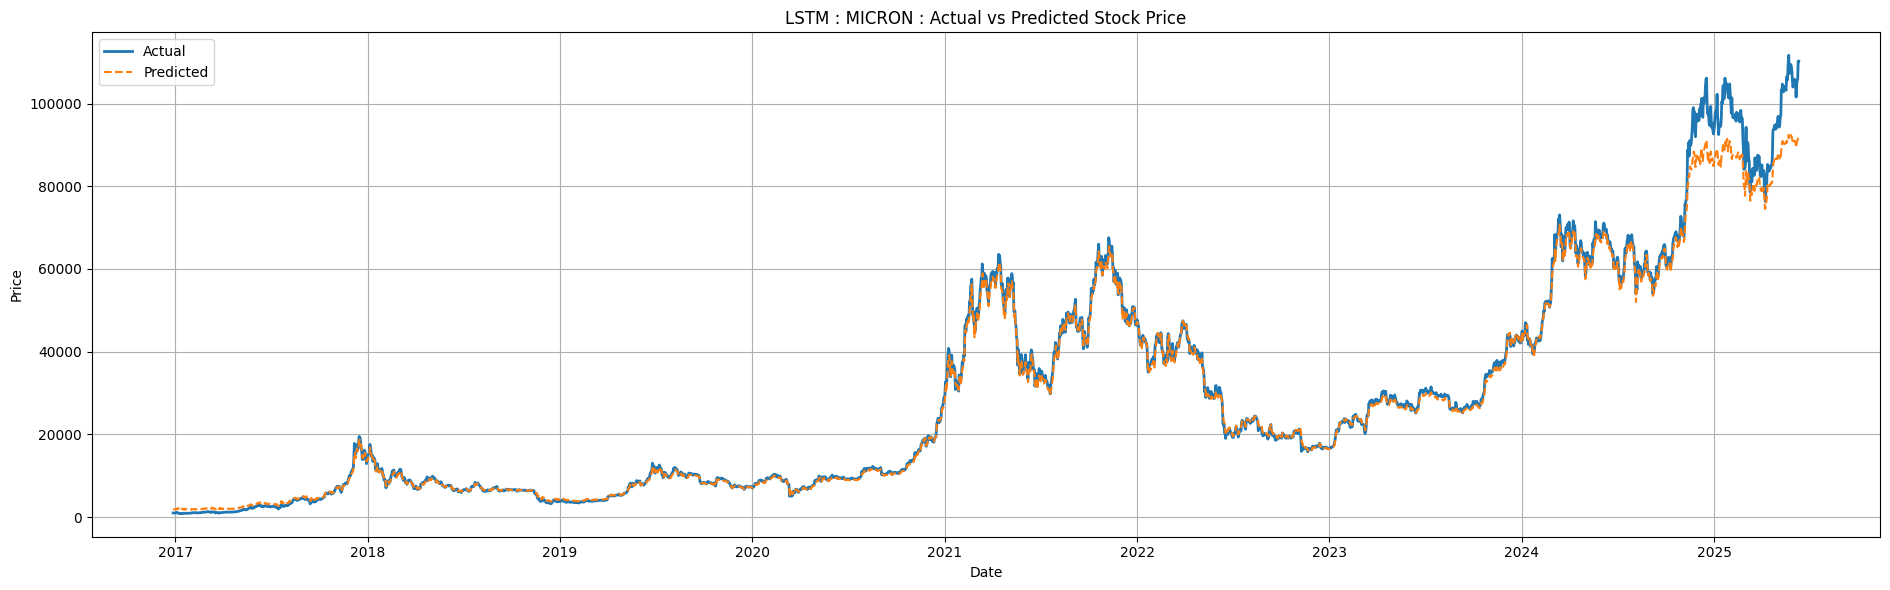

In [ ]:
import matplotlib.pyplot as plt

test_dates = df1.index[-len(y):]
plt.figure(figsize=(19,6))
plt.plot(test_dates, y.flatten(), label='Actual', linewidth=2)
plt.plot(test_dates, pred2.flatten(), label='Predicted', linestyle='--')
plt.title('LSTM : MICRON : Actual vs Predicted Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
